In [2]:
import torch
%load_ext autoreload
%autoreload 2
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from TestingSuite import ModelsTestingSuite
from TestedModel import *
from Training.utlis import train_test_split_data
import pandas as pd
import joblib

### Loading Data

In [3]:
df = pd.read_pickle("../data/combined_df.pkl")
df["content_text_joined"] = df["content_words"].apply(lambda x: " ".join(x))
TEXT_COL = "content_text_joined"    
LABEL_COL = "is_spoiler"      

# Split
_, X, _, y = train_test_split_data(
    df,
    TEXT_COL,
    LABEL_COL
)

In [14]:
X.shape

(30000,)

In [17]:
batch_nr=30

### Initializing testing suite

In [4]:
suite=ModelsTestingSuite(X=X.to_numpy(),y=y.to_numpy())

In [5]:
tfidf_svm=joblib.load("../models/svm_tfidf.pkl")
bow_logreg=joblib.load("../models/logreg_bow.pkl")

In [6]:
suite.add(ClassicalModel(model=tfidf_svm,name="tfidf_svm"))
suite.add(ClassicalModel(model=bow_logreg,name="bow_logreg"))

In [10]:
bert_path="../Models/BERTa/final_model"
bert_tokenizer = AutoTokenizer.from_pretrained(bert_path)
bert_model = AutoModelForSequenceClassification.from_pretrained(bert_path)

In [11]:
suite.add(BertModel(model=bert_model,tokenizer=bert_tokenizer,name="bert"))

In [12]:
roberta_path="../Models/RoBERTa/final_model"
roberta_model=AutoModelForSequenceClassification.from_pretrained(roberta_path)
roberta_tokenizer = AutoTokenizer.from_pretrained(roberta_path)

In [13]:
suite.add(BertModel(model=roberta_model,tokenizer=roberta_tokenizer,name="roberta"))

## Evaluating metrics

In [18]:
acc_results=suite.evaluate(metric="accuracy",batch_nr=batch_nr)

Batch 1/30 finished
Batch 2/30 finished
Batch 3/30 finished
Batch 4/30 finished
Batch 5/30 finished
Batch 6/30 finished
Batch 7/30 finished
Batch 8/30 finished
Batch 9/30 finished
Batch 10/30 finished
Batch 11/30 finished
Batch 12/30 finished
Batch 13/30 finished
Batch 14/30 finished
Batch 15/30 finished
Batch 16/30 finished
Batch 17/30 finished
Batch 18/30 finished
Batch 19/30 finished
Batch 20/30 finished
Batch 21/30 finished
Batch 22/30 finished
Batch 23/30 finished
Batch 24/30 finished
Batch 25/30 finished
Batch 26/30 finished
Batch 27/30 finished
Batch 28/30 finished
Batch 29/30 finished
Batch 30/30 finished


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

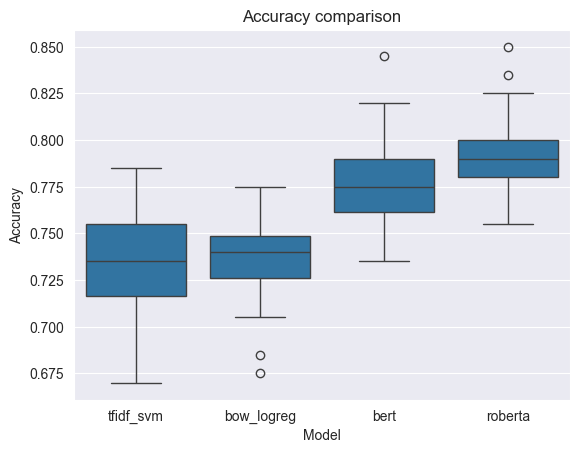

In [21]:
df=pd.DataFrame.from_dict(acc_results)
df1=df.melt().rename(columns={"value":"Accuracy","variable":"Model"})
plot=sns.boxplot(x="Model",y="Accuracy",data=df1).set_title("Accuracy comparison")
fig=plot.get_figure()
fig.savefig("figs/Accuracy_comparison.png")

In [22]:
f1_results=suite.evaluate(metric="f1_score",batch_nr=batch_nr)

Batch 1/30 finished
Batch 2/30 finished
Batch 3/30 finished
Batch 4/30 finished
Batch 5/30 finished
Batch 6/30 finished
Batch 7/30 finished
Batch 8/30 finished
Batch 9/30 finished
Batch 10/30 finished
Batch 11/30 finished
Batch 12/30 finished
Batch 13/30 finished
Batch 14/30 finished
Batch 15/30 finished
Batch 16/30 finished
Batch 17/30 finished
Batch 18/30 finished
Batch 19/30 finished
Batch 20/30 finished
Batch 21/30 finished
Batch 22/30 finished
Batch 23/30 finished
Batch 24/30 finished
Batch 25/30 finished
Batch 26/30 finished
Batch 27/30 finished
Batch 28/30 finished
Batch 29/30 finished
Batch 30/30 finished


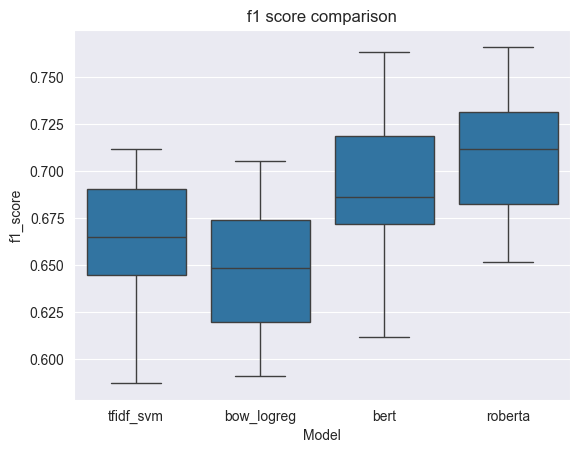

In [23]:
df=pd.DataFrame.from_dict(f1_results)
df1=df.melt().rename(columns={"value":"f1_score","variable":"Model"})
plot=sns.boxplot(x="Model",y="f1_score",data=df1).set_title("f1 score comparison")
fig=plot.get_figure()
fig.savefig("figs/f1_results_comparison.png")

In [24]:
mcc_results=suite.evaluate(metric="mcc",batch_nr=batch_nr)

Batch 1/30 finished
Batch 2/30 finished
Batch 3/30 finished
Batch 4/30 finished
Batch 5/30 finished
Batch 6/30 finished
Batch 7/30 finished
Batch 8/30 finished
Batch 9/30 finished
Batch 10/30 finished
Batch 11/30 finished
Batch 12/30 finished
Batch 13/30 finished
Batch 14/30 finished
Batch 15/30 finished
Batch 16/30 finished
Batch 17/30 finished
Batch 18/30 finished
Batch 19/30 finished
Batch 20/30 finished
Batch 21/30 finished
Batch 22/30 finished
Batch 23/30 finished
Batch 24/30 finished
Batch 25/30 finished
Batch 26/30 finished
Batch 27/30 finished
Batch 28/30 finished
Batch 29/30 finished
Batch 30/30 finished


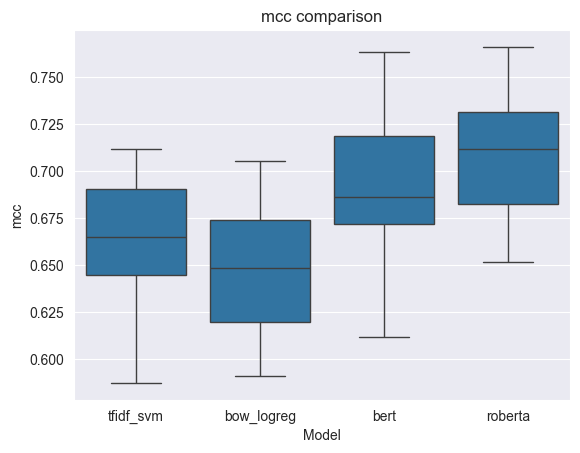

In [25]:
df=pd.DataFrame.from_dict(f1_results)
df1=df.melt().rename(columns={"value":"mcc","variable":"Model"})
plot=sns.boxplot(x="Model",y="mcc",data=df1).set_title("mcc comparison")
fig=plot.get_figure()
fig.savefig("figs/mcc_results_comparison.png")

### Inference time tests



In [26]:
time_results=suite.measure_time(batch_nr=batch_nr)

Batch 1/30 finished
Batch 2/30 finished
Batch 3/30 finished
Batch 4/30 finished
Batch 5/30 finished
Batch 6/30 finished
Batch 7/30 finished
Batch 8/30 finished
Batch 9/30 finished
Batch 10/30 finished
Batch 11/30 finished
Batch 12/30 finished
Batch 13/30 finished
Batch 14/30 finished
Batch 15/30 finished
Batch 16/30 finished
Batch 17/30 finished
Batch 18/30 finished
Batch 19/30 finished
Batch 20/30 finished
Batch 21/30 finished
Batch 22/30 finished
Batch 23/30 finished
Batch 24/30 finished
Batch 25/30 finished
Batch 26/30 finished
Batch 27/30 finished
Batch 28/30 finished
Batch 29/30 finished
Batch 30/30 finished


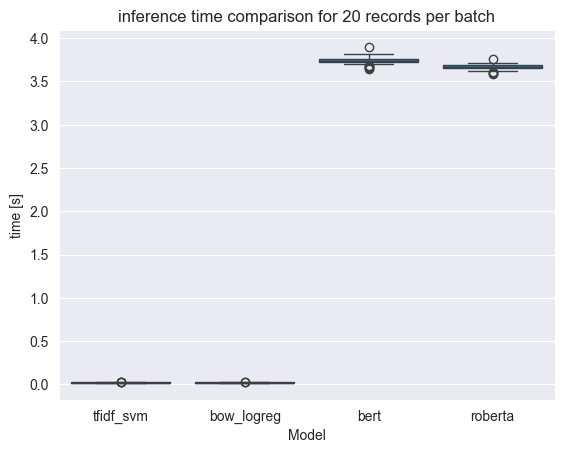

In [27]:
dft=pd.DataFrame.from_dict(time_results)
dft1=dft.melt().rename(columns={"value":"time [s]","variable":"Model"})
sns.boxplot(x="Model",y="time [s]",data=dft1).set_title(f"inference time comparison for 20 records per batch")
fig=plot.get_figure()
fig.savefig("figs/mcc_results_comparison.png")